# Part 2: Image Classification with Deep Learning (40 Points)

### 1. Load the dataset (CIFAR – 10) from the given link: https://www.cs.toronto.edu/~kriz/cifar.html (2 points)

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##### Use pickle method to load the data 

In [41]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

###### Ref: https://www.youtube.com/watch?v=pBOfQTfDMVg

In [43]:
train_1_file = '/content/drive/MyDrive/cifar-10-batches-py/data_batch_1'

In [44]:
train_batch_1 = unpickle(train_1_file)

##### The data is a dictionary

In [45]:
train_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [46]:
train_batch_1[b'data'], train_batch_1[b'data'].shape

(array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ...,
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8), (10000, 3072))

###### Reshape and transpose the given image as it contains R, G and B with 1024 value each

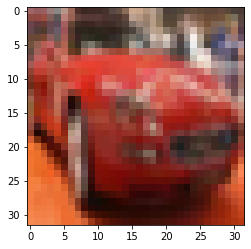

In [47]:
%matplotlib inline
pr_image = train_batch_1[b'data'][5]
pr_image = pr_image.reshape(3,32,32)
pr_image = pr_image.transpose(1,2,0)
plt.imshow(pr_image)

##### Reshape and trans

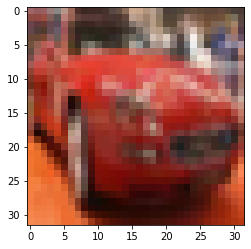

In [48]:
train_data = train_batch_1[b'data']
train_data = train_data.reshape(len(train_data),3,32,32).transpose(0,2,3,1)
plt.imshow(train_data[5])

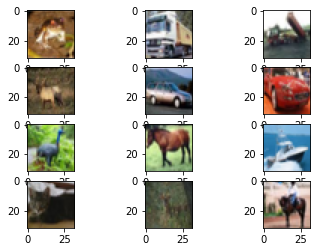

In [49]:
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(train_data[i])
plt.show()

##### Direct way of loading and extracting train and test dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 3)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 3)
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


### 2. Explain in your own words: (7 points)

#### a. Gradient Descent (1 point)

##### Ref: https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression).

Gradient Desent is an first order iterative optimization algorithm that is used for finding the local minimum or maximum for the given function. We use this method commonly in deep learning to mimize the cost or loss function.

Gradient Desent ( minimum of convex function)

#### b. Drop out (1 point)

It is a simple way to prevent neural networks from overfitting. The term "dropout" refers to the dropping of the units randomly in the neural network, a form of regularization. It is usually done as percent less than 50% of total units. If dropout is more then the rate of convergence is slow and the model performance is also affected.

#### c. Activation functions (1 point)

#### Ref: https://www.analyticsvidhya.com/blog/2022/03/a-basic-introduction-to-activation-function-in-deep-learning/
 https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253
 
Activation function helps the artificial neural network to learn patterns in the data. It calculates a weighted total and then adds to the bias to decide whether a neuran should be activated or not. Activation functions add non linearity to the neural network, without which a neural network can not model nonlinear relationship. Also, activation functions keeps the output in certain range.



#### d. Back Propagation (1 point)

##### Ref: https://www.techtarget.com/searchenterpriseai/definition/backpropagation-algorithm

Backpropagation (chain rule/Backward pass) is an algorithm and it is designed to test for errors. It is the essence of neural network training which helps to fine tune the weigths of the neural network based on the error from previous epoch/iteration. It works back from output nodes to input nodes. It is one of the important mathematical tool to improve the accuracy of the predictions. It find out the values using derivatives.

#### e. Epochs, Iterations and Batch size (3 points)

####              Epoches

##### Ref: https://www.baeldung.com/cs/epoch-neural-networks

An epoch involves the training of neural network with all the training data for one cycle and it use all of data exactly once. 



#### Batch Size

##### Ref: https://medium.com/mlearning-ai/difference-between-the-batch-size-and-epoch-in-neural-network-2d2cb2a16734

Batch size is number of samples that are usually pass through the neural network at one time. One or more batches are combined in an epoch. Batch size is used to train the part of the train dataset in the neural network.

##### Iterations

Passing through the training dataset in a batch is called as iterations.

Ex: Let say we have 1000 data points. If the batch size is 1000 then epoch completes in 1 iterations whereas if batch size is 500 then epoch complets in two iterations and so on.

### 3. Visualize / summarize the data (10 points)

#### a. Number of entities in training and testing set and number of classes in target variable (1 point)

In [3]:
print("Entities in training images: ",train_images.shape)
print("Entities in testing images: ",test_images.shape)

Entities in training images:  (50000, 32, 32, 3)
Entities in testing images:  (10000, 32, 32, 3)


In [4]:
print("Entities in training labels: ",train_labels.shape)
print("Entities in testing labels: ",test_labels.shape)

Entities in training labels:  (50000, 1)
Entities in testing labels:  (10000, 1)


In [5]:
import numpy as np
print("Number of classes in target variable: ",len(np.unique(train_labels)))

Number of classes in target variable:  10


In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#### b. Number of pixels in the image (Height and width individually) (2 points)

In [7]:
train_images[0].shape, test_images[0].shape

((32, 32, 3), (32, 32, 3))

#### c. Number of images per class (1 point)

[0 1 2 3 4 5 6 7 8 9] [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


<BarContainer object of 10 artists>

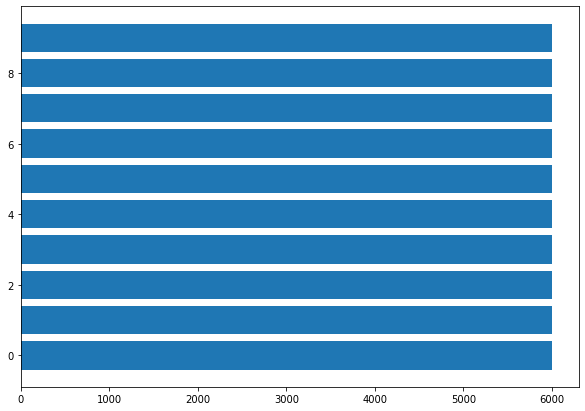

In [8]:
import seaborn as sns
arr = np.concatenate((train_labels, test_labels))

classes, counts = np.unique(arr, return_counts=True)
print(classes, counts)
plt.figure(figsize=(10,7))
# p = sns.countplot(arr.flatten())
# p.set(xticklabels = class_names)
plt.barh(classes, counts)
# plt.title('Class distribution')

It shows there are 6000 images for each class.

#### d. Display at least 2 images of each class (6 points)

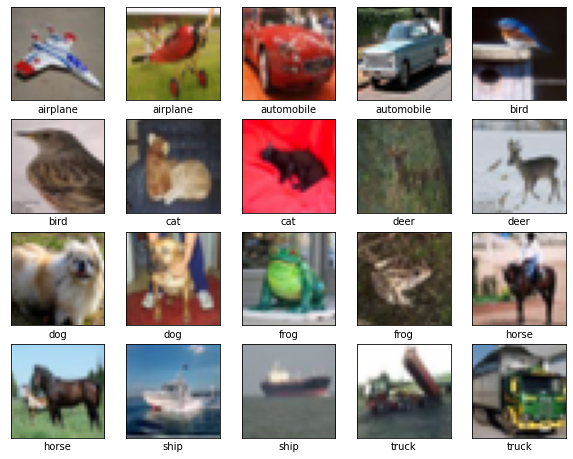

In [9]:
plt.figure(figsize=(10,10))
res = []
for i in classes:
  result = np.where(train_labels == i)
  res.append(result[0][1])
  res.append(result[0][2])
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[res[i]])
    plt.xlabel(class_names[train_labels[res[i]][0]])
plt.show()


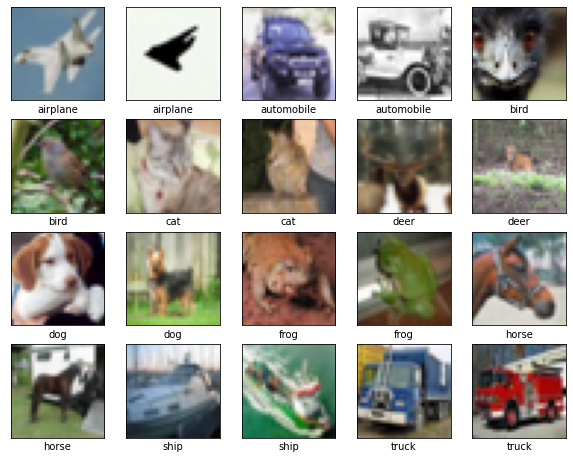

In [10]:
plt.figure(figsize=(10,10))
res = []
for i in classes:
  result = np.where(test_labels == i)
  res.append(result[0][1])
  res.append(result[0][2])
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[res[i]])
    plt.xlabel(class_names[test_labels[res[i]][0]])
plt.show()


### 4. Train a neural network (21 points)

#### a. Decide number of layers and neurons in each layer (2 points)

In [11]:
input_shape = (32, 32, 3)
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()
train_labels = tf.one_hot(train_labels.astype(np.int32), depth=10)
test_labels = tf.one_hot(test_labels.astype(np.int32), depth=10)

In [12]:
batch_size = 32
num_classes = 10
epochs = 20

In [13]:
Init_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape = train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

Init_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])



In [14]:
Init_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

#### b. Try out different activation functions (explain each one you used) (4 points)

In [15]:
Init_history = Init_model.fit(train_images, train_labels, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 17s 6ms/step - loss: 1.7376 - accuracy: 0.3768 - val_loss: 1.5622 - val_accuracy: 0.4436
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4305 - accuracy: 0.4889 - val_loss: 1.3441 - val_accuracy: 0.5124
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2924 - accuracy: 0.5433 - val_loss: 1.3233 - val_accuracy: 0.5318
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1928 - accuracy: 0.5807 - val_loss: 1.1817 - val_accuracy: 0.5858
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1101 - accuracy: 0.6116 - val_loss: 1.0980 - val_accuracy: 0.6216
Epoch 6/20
1407/1407 [==============================] - 8s 5ms/step - loss: 1.0379 - accuracy: 0.6400 - val_loss: 1.1376 - val_accuracy: 0.6082
Epoch 7/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9818 - accuracy: 0.6586 - val_loss: 0.9964 - val_accuracy

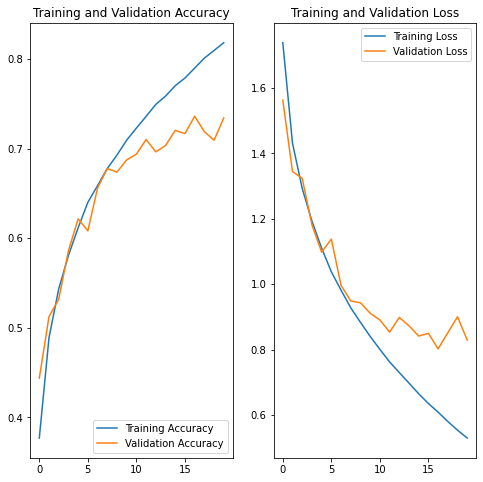

In [16]:
acc = Init_history.history['accuracy']
val_acc = Init_history.history['val_accuracy']

loss = Init_history.history['loss']
val_loss = Init_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
Init_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape = train_images.shape[1:], activation='sigmoid'),
    tf.keras.layers.Conv2D(32, 3, activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.Conv2D(64, 3, activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [18]:
Init_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [19]:
Init_model_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

Init_history_1 = Init_model_1.fit(train_images, train_labels, epochs=epochs, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 2.3118 - accuracy: 0.0994 - val_loss: 2.3100 - val_accuracy: 0.1038
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3062 - accuracy: 0.0998 - val_loss: 2.3063 - val_accuracy: 0.0970
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 2.2629 - accuracy: 0.1348 - val_loss: 2.1009 - val_accuracy: 0.2376
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 2.0513 - accuracy: 0.2614 - val_loss: 2.0126 - val_accuracy: 0.2800
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9724 - accuracy: 0.2970 - val_loss: 1.9406 - val_accuracy: 0.3108
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9133 - accuracy: 0.3175 - val_loss: 1.9024 - val_accuracy: 0.3236
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.8696 - accuracy: 0.3329 - val_loss: 1.8742 - val_accuracy:

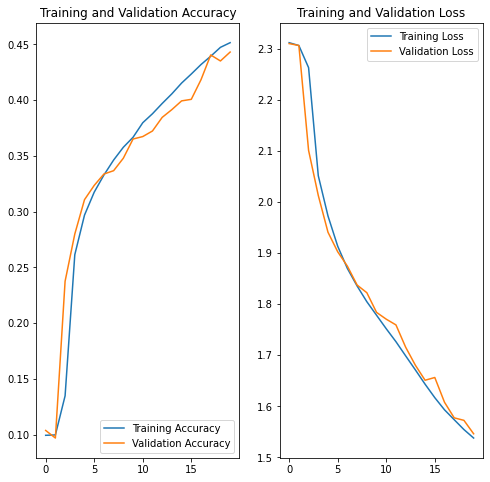

In [20]:
acc = Init_history_1.history['accuracy']
val_acc = Init_history_1.history['val_accuracy']

loss = Init_history_1.history['loss']
val_loss = Init_history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### Sigmoid: 
The sigmoid function is also called a squashing function as its domain is the set of all real numbers, and its range is (0, 1). Hence, if the input to the function is either a very large negative number or a very large positive number,  the output is always between 0 and 1. Same goes for any number between -∞ and +∞.

###### Relu:
The rectified linear activation function is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 or less.

![image.png](attachment:image.png)

##### Advantages of Relu over Sigmoid
1. Computational Simplicity (ReLUs are much simpler computationally.  The forward and backward passes through ReLU are both just a simple "if" statement.  Sigmoid activation, in comparison, requires computing an exponent.)
2. Representational Sparsity
3. Linear Behavior
4. Avoids Vanishing Gradient (Additionally, sigmoid activations are easier to saturate. There is a comparatively narrow interval of inputs for which the Sigmoid's derivative is sufficiently nonzero. In other words, once a sigmoid reaches either the left or right plateau, it is almost meaningless to make a backward pass through it, since the derivative is very close to 0.  On the other hand, ReLU only saturates when the input is less than 0.  And even this saturation can be eliminated by using leaky ReLUs.  For very deep networks, saturation hampers learning, and so ReLU provides a nice workaround. )

#### Observations
1. The accuracy of the model is high when using Relu activation function.
2. The training time almost looks similar.
3. Even though the accuracy is low, the training and validation accuracy is similar in sigmoid.


###### Ref: https://wandb.ai/ayush-thakur/dl-question-bank/reports/ReLU-vs-Sigmoid-Function-in-Deep-Neural-Networks--VmlldzoyMDk0MzI


#### c. Try with and without using drop out (4 points)

In [21]:
first_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes,activation='softmax'),
])


In [22]:
first_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [23]:
first_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

first_history = first_model.fit(train_images, train_labels, epochs = epochs, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9030 - accuracy: 0.3036 - val_loss: 1.6857 - val_accuracy: 0.4000
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5925 - accuracy: 0.4236 - val_loss: 1.5085 - val_accuracy: 0.4536
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4611 - accuracy: 0.4741 - val_loss: 1.3566 - val_accuracy: 0.5120
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3640 - accuracy: 0.5108 - val_loss: 1.2686 - val_accuracy: 0.5516
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2901 - accuracy: 0.5396 - val_loss: 1.2497 - val_accuracy: 0.5594
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2294 - accuracy: 0.5625 - val_loss: 1.1744 - val_accuracy: 0.5800
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1731 - accuracy: 0.5854 - val_loss: 1.0700 - val_accuracy:

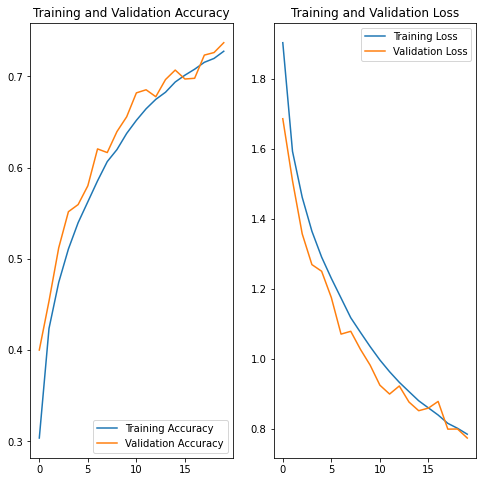

In [24]:
acc = first_history.history['accuracy']
val_acc = first_history.history['val_accuracy']

loss = first_history.history['loss']
val_loss = first_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### Advantage of Dropout: 
The main advantage of this method is that it prevents all neurons in a layer from synchronously optimizing their weights. This adaptation, made in random groups, prevents all the neurons from converging to the same goal, thus decorrelating the weights.

A second property discovered for the application of dropout is that the activations of the hidden units become sparse, which is also a desirable characteristic.

###### Observations: (Comparing Init_model, first_model)
When we compare the training and validation accuracy of "Init_model" and "first_model", the validation accuracy is saturated and validation loss is also saturated at higher point after few epochs in init_model, but in later, the validation accuracy is almost increased along with training accuracy and validation loss is reduced along with training loss. 

#### d. Try different regularizations apart from drop out (4 points)

#### Ref: https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer

In [25]:
second_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)
                             ,activity_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes,activation='softmax'),
])

In [26]:
second_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [27]:
second_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

second_history = second_model.fit(train_images, train_labels, epochs = epochs, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 10s 7ms/step - loss: 3.8523 - accuracy: 0.3007 - val_loss: 2.4184 - val_accuracy: 0.3598
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 2.1104 - accuracy: 0.4002 - val_loss: 1.9002 - val_accuracy: 0.4212
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8337 - accuracy: 0.4342 - val_loss: 1.7532 - val_accuracy: 0.4528
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7130 - accuracy: 0.4581 - val_loss: 1.6370 - val_accuracy: 0.4828
Epoch 5/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6434 - accuracy: 0.4801 - val_loss: 1.5813 - val_accuracy: 0.5058
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5967 - accuracy: 0.4964 - val_loss: 1.5757 - val_accuracy: 0.4948
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5627 - accuracy: 0.5110 - val_loss: 1.5097 - val_accuracy

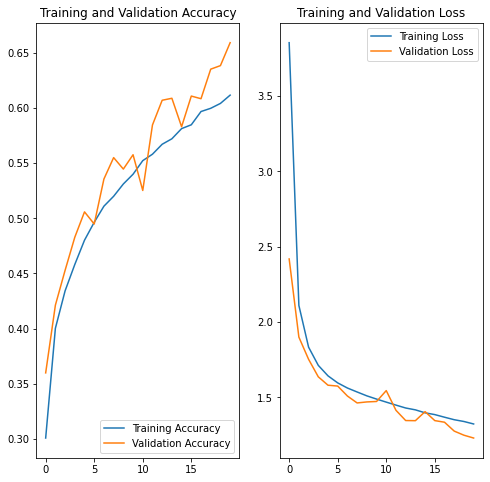

In [28]:
acc = second_history.history['accuracy']
val_acc = second_history.history['val_accuracy']

loss = second_history.history['loss']
val_loss = second_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
third_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)
                             ,activity_regularizer=tf.keras.regularizers.L2(0.001)),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes,activation='softmax'),
])
third_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [30]:
third_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

third_history = third_model.fit(train_images, train_labels, epochs = epochs, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 10s 6ms/step - loss: 3.5907 - accuracy: 0.3394 - val_loss: 2.2416 - val_accuracy: 0.4042
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9981 - accuracy: 0.4282 - val_loss: 1.8392 - val_accuracy: 0.4380
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7577 - accuracy: 0.4645 - val_loss: 1.7194 - val_accuracy: 0.4610
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6342 - accuracy: 0.4962 - val_loss: 1.6049 - val_accuracy: 0.4886
Epoch 5/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5590 - accuracy: 0.5156 - val_loss: 1.5480 - val_accuracy: 0.5112
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5030 - accuracy: 0.5351 - val_loss: 1.5204 - val_accuracy: 0.5270
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4601 - accuracy: 0.5480 - val_loss: 1.5599 - val_accuracy

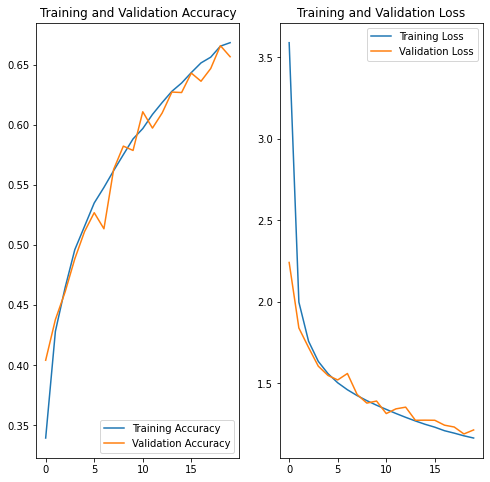

In [31]:
acc = third_history.history['accuracy']
val_acc = third_history.history['val_accuracy']

loss = third_history.history['loss']
val_loss = third_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### Regularization
Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it. 
![image.png](attachment:image.png)
###### Weight Regularization
L1 regularization: The cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).
L2 regularization: The cost added is proportional to the square of the value of the weights coefficients (i.e. penalizing larger weights more severely). It is also called weight decay in the contextof neural networks.

###### Observation:
Both regularization methods are applied to the neural network with various scales of network complexity. The results show that dropout alone is more effective than droupout with L1 and L2 and regularization alone.

###### Ref: https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning#:~:text=Regularization%20refers%20to%20techniques%20that,and%20prevent%20overfitting%20or%20underfitting.&text=Using%20Regularization%2C%20we%20can%20fit,reduce%20the%20errors%20in%20it.

#### e. Try different optimization algorithms (such as Gradient Descent, Adam etc.) (4 points)

#### Ref: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

In [33]:
!pip install tensorflow-addons
from keras import backend as ba
import tensorflow_addons as tfa

def cal_recall(y_true, y_pred):
    true_positives = ba.sum(ba.round(ba.clip(y_true * y_pred, 0, 1)))
    poss_positives = ba.sum(ba.round(ba.clip(y_true, 0, 1)))
    recall = true_positives / (poss_positives + ba.epsilon())
    return recall

def cal_precision(y_true, y_pred):
    true_positives = ba.sum(ba.round(ba.clip(y_true * y_pred, 0, 1)))
    pred_positives = ba.sum(ba.round(ba.clip(y_pred, 0, 1)))
    precision = true_positives / (pred_positives + ba.epsilon())
    return precision

def cal_f1(y_true, y_pred):
#     print(y_true.shape)
#     print(y_pred.shape)
#     metric = tfa.metrics.F1Score(num_classes=10, threshold=0.5)
#     metric.update_state(y_true, y_pred)
#     result = metric.result()
#     return result.numpy()
    precision = cal_precision(y_true, y_pred)
    recall = cal_recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.5 MB/s 


In [34]:
first_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
            loss='categorical_crossentropy', metrics=['accuracy',cal_f1,cal_precision, cal_recall])

first_history = first_model.fit(train_images, train_labels, epochs=epochs,validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 10s 6ms/step - loss: 0.7670 - accuracy: 0.7354 - cal_f1: 0.7218 - cal_precision: 0.8259 - cal_recall: 0.6436 - val_loss: 0.8683 - val_accuracy: 0.7044 - val_cal_f1: 0.6948 - val_cal_precision: 0.8004 - val_cal_recall: 0.6162
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7578 - accuracy: 0.7359 - cal_f1: 0.7240 - cal_precision: 0.8235 - cal_recall: 0.6485 - val_loss: 0.7638 - val_accuracy: 0.7422 - val_cal_f1: 0.7275 - val_cal_precision: 0.8300 - val_cal_recall: 0.6499
Epoch 3/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.7492 - accuracy: 0.7399 - cal_f1: 0.7292 - cal_precision: 0.8280 - cal_recall: 0.6539 - val_loss: 0.7348 - val_accuracy: 0.7514 - val_cal_f1: 0.7364 - val_cal_precision: 0.8329 - val_cal_recall: 0.6624
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7420 - accuracy: 0.7416 - cal_f1: 0.7307 - cal_precision: 0.8284 - cal_recall: 0.

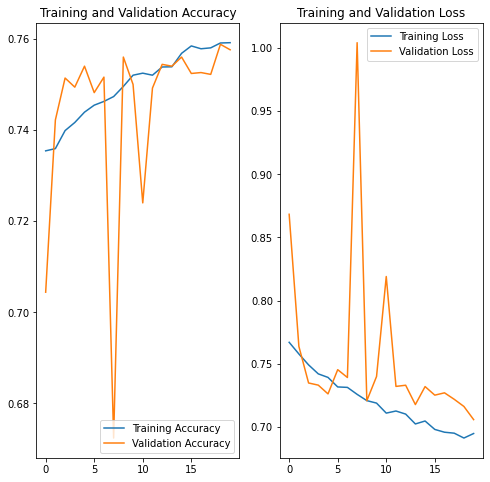

In [35]:
acc = first_history.history['accuracy']
val_acc = first_history.history['val_accuracy']

loss = first_history.history['loss']
val_loss = first_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
first_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy', metrics=['accuracy',cal_f1,cal_precision, cal_recall])

first_history = second_model.fit(train_images, train_labels, epochs=epochs,validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3141 - accuracy: 0.6146 - val_loss: 1.3319 - val_accuracy: 0.6152
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3033 - accuracy: 0.6159 - val_loss: 1.2234 - val_accuracy: 0.6648
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2871 - accuracy: 0.6272 - val_loss: 1.2143 - val_accuracy: 0.6658
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2730 - accuracy: 0.6309 - val_loss: 1.2016 - val_accuracy: 0.6630
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2660 - accuracy: 0.6330 - val_loss: 1.2131 - val_accuracy: 0.6578
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2543 - accuracy: 0.6381 - val_loss: 1.2254 - val_accuracy: 0.6588
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2417 - accuracy: 0.6439 - val_loss: 1.3652 - val_accuracy:

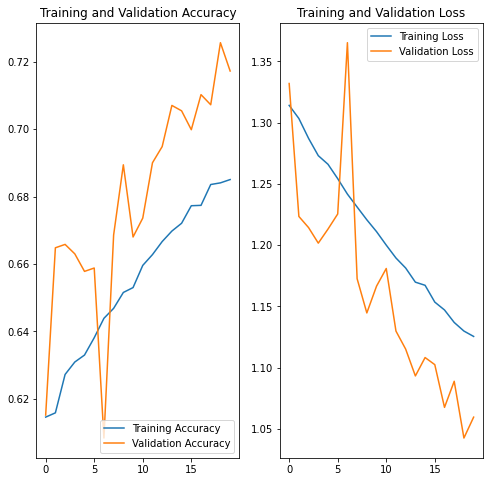

In [37]:
acc = first_history.history['accuracy']
val_acc = first_history.history['val_accuracy']

loss = first_history.history['loss']
val_loss = first_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Optimizers

###### Gradient Descent
Gradient descent is a first-order optimization algorithm which is dependent on the first order derivative of a loss function. It calculates that which way the weights should be altered so that the function can reach a minima. Through backpropagation, the loss is transferred from one layer to another and the model’s parameters also known as weights are modified depending on the losses so that the loss can be minimized.

###### Stochastic Gradient Descent
It tries to update the model’s parameters more frequently. In this, the model parameters are altered after computation of loss on each training example. So, if the dataset contains 1000 rows SGD will update the model parameters 1000 times in one cycle of dataset instead of one time as in Gradient Descent.

###### Adam
Adam (Adaptive Moment Estimation) works with momentums of first and second order. The intuition behind the Adam is that we don’t want to roll so fast just because we can jump over the minimum, we want to decrease the velocity a little bit for a careful search. In addition to storing an exponentially decaying average of past squared gradients like AdaDelta, Adam also keeps an exponentially decaying average of past gradients M(t).

###### RMSprop Optimizer

The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster.

#### Observations with RMSProp, SGD and Adam:
RMSprop optimizer yeilds better accuracy and low loss compared to Adam and SGD optimizer.

###### Ref: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

#### f. Create a graph of f1 score vs epochs for training and validation set. (2 points)

In [38]:
first_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy',cal_f1,cal_precision, cal_recall])

first_history = first_model.fit(train_images, train_labels, epochs = epochs, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7177 - accuracy: 0.7515 - cal_f1: 0.7440 - cal_precision: 0.8306 - cal_recall: 0.6761 - val_loss: 0.7040 - val_accuracy: 0.7596 - val_cal_f1: 0.7569 - val_cal_precision: 0.8282 - val_cal_recall: 0.6986
Epoch 2/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7062 - accuracy: 0.7539 - cal_f1: 0.7456 - cal_precision: 0.8294 - cal_recall: 0.6794 - val_loss: 0.7124 - val_accuracy: 0.7626 - val_cal_f1: 0.7551 - val_cal_precision: 0.8290 - val_cal_recall: 0.6957
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6997 - accuracy: 0.7568 - cal_f1: 0.7482 - cal_precision: 0.8340 - cal_recall: 0.6807 - val_loss: 0.7233 - val_accuracy: 0.7558 - val_cal_f1: 0.7502 - val_cal_precision: 0.8387 - val_cal_recall: 0.6807
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6948 - accuracy: 0.7599 - cal_f1: 0.7507 - cal_precision: 0.8346 - cal_recall: 0.


 Test accuracy: 0.7739999890327454

 Loss: 0.6714765429496765

 Precision and Recall: 0.8445544838905334 0.6976836919784546

 F1 Score: 0.7626603245735168


Text(0.5, 1.0, 'F1 Score vs Epoch')

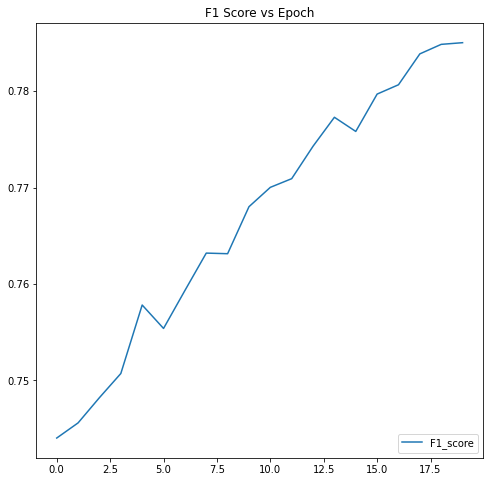

In [39]:
# evaluate the model
loss, test_acc, f1_score, precision, recall = first_model.evaluate(test_images, test_labels, verbose=0)

print('\n Test accuracy:', test_acc)
print('\n Loss:', loss)
print('\n Precision and Recall:', precision,recall)
print('\n F1 Score:', f1_score)

f1_score = first_history.history['cal_f1']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, f1_score, label='F1_score')
plt.legend(loc='lower right')
plt.title('F1 Score vs Epoch')

#### g. Calculate number of trainable parameters in your final model. (1 point)

#### Ref: https://lindevs.com/count-number-of-parameters-of-model-in-tensorflow-2

Considering all the combinations, we chose first_model as our final model.

In [40]:
import numpy as np

trainable_parameters = np.sum([np.prod(v.get_shape()) for v in first_model.trainable_weights])
non_trainable_parameters = np.sum([np.prod(v.get_shape()) for v in first_model.non_trainable_weights])
total_params = trainable_parameters + non_trainable_parameters

print("\n Trainable parameters:",trainable_parameters)
print("\n Non trainable parameters:",non_trainable_parameters)
print("\n Total Parameters",total_params)


 Trainable parameters: 361898

 Non trainable parameters: 0.0

 Total Parameters 361898.0
